# `DigitRecognizer

## Importing Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical

## Loading Datasets 

In [2]:
train=pd.read_csv("E:\\Kaggel compitiion\\Digit Recognizer\\Dataset\\train.csv")
test=pd.read_csv('E:\\Kaggel compitiion\\Digit Recognizer\\Dataset\\test.csv')
sub=pd.read_csv("E:\\Kaggel compitiion\\Digit Recognizer\\Dataset\\sample_submission.csv")

## EDA

In [3]:
x=train.drop("label",axis=1)
y=train['label']

In [4]:
x.shape
test.shape
sub.shape

(28000, 2)

In [5]:
# Normalizing
x/=255.0
test/=255.0

In [6]:
# Reshape in to height =28, weidth=28
x=x.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

## Spliting Dataset

In [7]:
k=len(set(y))
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

## Example

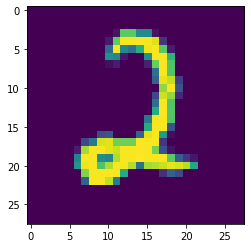

In [8]:
i=4
plt.imshow(x_train[i][:,:,0])

## Adding Layer

In [9]:
model=Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.20))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(k,activation='softmax'))

model.compile(optimizer="RMSprop",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=10)


Epoch 1/10
3570/3570 [==============================] - 31s 9ms/step - loss: 0.1564 - accuracy: 0.9524 - val_loss: 0.0989 - val_accuracy: 0.9732
Epoch 2/10
3570/3570 [==============================] - 32s 9ms/step - loss: 0.0785 - accuracy: 0.9817 - val_loss: 0.0681 - val_accuracy: 0.9825
Epoch 3/10
3570/3570 [==============================] - 30s 8ms/step - loss: 0.0818 - accuracy: 0.9818 - val_loss: 0.1252 - val_accuracy: 0.9829
Epoch 4/10
3570/3570 [==============================] - 30s 8ms/step - loss: 0.0881 - accuracy: 0.9826 - val_loss: 0.0598 - val_accuracy: 0.9860
Epoch 5/10
3570/3570 [==============================] - 30s 8ms/step - loss: 0.0964 - accuracy: 0.9821 - val_loss: 0.0631 - val_accuracy: 0.9840
Epoch 6/10
3570/3570 [==============================] - 30s 9ms/step - loss: 0.1049 - accuracy: 0.9801 - val_loss: 0.1481 - val_accuracy: 0.9735
Epoch 7/10
3570/3570 [==============================] - 30s 8ms/step - loss: 0.1132 - accuracy: 0.9794 - val_loss: 0.0980 - val_ac

## Look at confusion matrix 

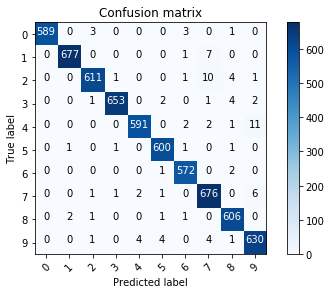

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_test= to_categorical(y_test, num_classes = 10)
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

## Display some error results

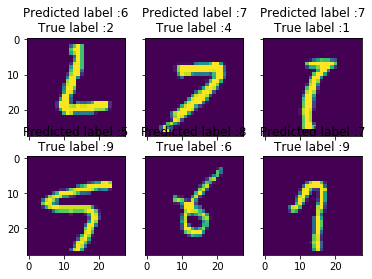

In [11]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## Prediction

In [12]:
test_pred=model.predict(test)
test_pred=np.argmax(test_pred,axis = 1) 

## Saving

In [13]:
ID=sub['ImageId']
Sur=test_pred
submission = pd.DataFrame({'ImageId':ID,'Label':Sur})
submission.to_csv(r"E:\\Kaggel compitiion\\Digit Recognizer\\sub.csv",index=False)
